# 1.. How to read data using sqlite3 !

### Columns description
url contains the url of the restaurant in the zomato website

address contains the address of the restaurant in Bengaluru

name contains the name of the restaurant

online_order whether online ordering is available in the restaurant or not

book_table table book option available or not

rate contains the overall rating of the restaurant out of 5

votes contains total number of rating for the restaurant as of the above mentioned date

phone contains the phone number of the restaurant

location contains the neighborhood in which the restaurant is located

rest_type restaurant type

dish_liked dishes people liked in the restaurant

cuisines food styles, separated by comma

approx_cost(for two people) contains the approximate cost for meal for two people

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
# very first u have to create a SQL connection to our SQLite database
con=sqlite3.connect("zomato_rawdata.sqlite")

In [4]:
#### check online its table name on https://sqliteonline.com/
pd.read_sql_query("SELECT * FROM Users" , con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df=pd.read_sql_query("SELECT * FROM Users" , con)

In [6]:
df.shape

(51717, 18)

In [7]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# 2.. how to deal with missing values ?
its not good to drop missing value right now as we might loose important info , so 
we will deal with it depending upon the problem statements ..

In [8]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
'''
     -->> As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column
         We will keep that column for now..
        
     -->> let's check for rate column as it contains 15% of its points as null value which 
         is one of the most important feature.. 
         
'''

"\n     -->> As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column\n         We will keep that column for now..\n        \n     -->> let's check for rate column as it contains 15% of its points as null value which \n         is one of the most important feature.. \n         \n"

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
-->> 1... So, Now we found this column has 'NEW' ,"-" values which should replaced by zero or np.nan 
        after having conversation with my business team ( Domain Expertise)..

-->> 2...there are values as '3.8/5' instead of 3.8 , ie we have to fix this .. 

SyntaxError: invalid syntax (2326091020.py, line 1)

### so lets replace 'NEW' & '-' with np.nan or with "missing value" ,so that we can fill later it with some value..

In [ ]:
df["rate"].replace(("NEW","-"),np.nan,inplace=True)

In [ ]:
df['rate'].unique()

In [ ]:
"4.1/5".split('/')[0]

In [ ]:
type("4.1/5".split('/')[0])

In [ ]:
float("4.1/5".split('/')[0])

In [ ]:
df["rate"]=df["rate"].apply(lambda x : float(x.split("/")[0]) if type(x)==str else x)

In [ ]:
df.rate.unique()

# 3.. Is there a relation between online order option and rating of the restaurant ?

In [ ]:
df.sample(5)

In [ ]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 , 1 , 1.2 , 1.4 , 1.6--- & that accepts online_order & do not accept order
### for such problem statement , we will create frequency tables..

In [ ]:
x=pd.crosstab(df["rate"], df["online_order"])

In [ ]:
x

In [ ]:
x.plot(kind="bar",stacked = True)

In [ ]:
x.sum()

In [ ]:
x.sum(axis=0)

In [ ]:
x.sum(axis=1).astype(float)

In [ ]:
## we need Floating division of dataframe or normalized values of x dataframe across rows..just call x.div() & set axis=0
## div is a in-built function of pandas designed for dataframe data-structure..
normalize_df=x.div(x.sum(axis=1).astype(float),axis=0)

In [ ]:
normalize_df

In [ ]:
## lets multiply each value by 100 so that we will get much better results in % !
## stacked=True gives basically stacked bar chart
(normalize_df*100).plot(kind="bar",stacked=True)

In [ ]:
'''
Inference :: 

For good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings
than those rest. who don't accept online order 

'''

# 4.. Data Cleaning to perform Text Analysis
Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

# ways to do it..
a) using wordcloud

    But wordcloud will not give a clear cut , how important words are
    So lets use a concept of frequency over here...
    
b) using plots/charts-- where each word have some frequency..
b) using plots/charts

# We need Pre-processed data so that we can plot charts
ie  (Biryani , 10K)
    (Chicken , 15K)
    etc..
    

In [ ]:
df["rest_type"].isnull().sum()

In [ ]:
data=df.dropna(subset=["rest_type"])
data

In [ ]:
data["rest_type"].isnull().sum()

In [ ]:
data['rest_type'].unique()

In [ ]:
data['rest_type'].value_counts()

In [ ]:
### if we need whole data of 'Quick Bites' restaurant , we can use below code : 

In [ ]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [ ]:
quick_bites_df.head()

In [ ]:
quick_bites_df.shape

In [ ]:
quick_bites_df.columns

### How to Perform Data Pre-processing to pre-process this data..
    Steps-->>
        a) Perform Lower-case operation
        
        b) Do tokenization
        
        c) Removal of stopwords from data
        
        d) Store your entire data in the list so that we can commpute frequency of each word
        
        e) Do plotting , using Unigram  , bigram & Trigram analysis..

### a) Perform Lower-case operation

In [ ]:
quick_bites_df['reviews_list']

In [ ]:
quick_bites_df['reviews_list']=quick_bites_df['reviews_list'].apply(lambda x:x.lower())

In [ ]:
#### b) Do tokenization

In [ ]:
from nltk import RegexpTokenizer

In [13]:
##  Creating a regular expression tokenizer that have only alphabets , ie remove all the special characters
# This will return separate words (tokens) from the text in the form of list

tokenizer = RegexpTokenizer("[a-zA-Z]+")

NameError: name 'RegexpTokenizer' is not defined

In [ ]:
quick_bites_df["reviews_list"][3]

In [ ]:
tokenizer.tokenize(quick_bites_df["reviews_list"][3])

In [ ]:
reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

In [ ]:
reviews_tokens

# 5.. Performing Unigram analysis & removal of stopwords ..

In [ ]:
#### c) Removal of stopwords from data

In [14]:
from nltk.corpus import stopwords

In [15]:
# These are common words defined by Python developers that typically don't add meaning to the text and can be removed
stop = stopwords.words('english')

In [16]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
### we will figure out there are some more stopwords in my data, that we can add it to my stop list

In [18]:
# Adding custom words to stopwords 
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [19]:
### with respect to every row/list, how to remove stopwords

In [20]:
### with respect to fourth row, how to remove stopwords
rev3 = reviews_tokens[3]
print(rev3)

NameError: name 'reviews_tokens' is not defined

In [ ]:
print([token for token in rev3 if token not in stop])

In [ ]:
## remove stopwords from "reviews_tokens" Series ..
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [ ]:
reviews_tokens_clean

### d) Store your entire data in the list so that we can compute frequency of each word

In [ ]:
### now this reviews_tokens_clean is a series ,but we need entire data in the form of 1-D list so that we can compute frequency of
### each word

In [ ]:
type(reviews_tokens_clean)

 list( reviews_tokens_clean ) gives us 2-D list (list inside list) , 
    as each row is already a list & then we will convert this 2-D list into 1-D list

In [ ]:
total_reviews_2D = list(reviews_tokens_clean)

In [ ]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [ ]:
total_reviews_1D

#### e) Do plotting
1..Unigram analysis

2..Bigram Analysis

3..Trigram analysis

### 1..Unigram analysis

In [ ]:
# obtain the frequency of individual words in the reviews, for this u have to use FreqDist .. 

In [ ]:
from nltk import FreqDist

In [ ]:
fd=FreqDist()

In [21]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

NameError: name 'total_reviews_1D' is not defined

In [22]:
# Examining the top 20 most frequent words
fd.most_common(20)

NameError: name 'fd' is not defined

In [23]:
# Plotting the top 20 most frequent words
fd.plot(20)

NameError: name 'fd' is not defined

In [24]:
## Observations
## Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani

## but it is not that much clear whether food is good or not , 
## similarly what about chicken ??
## so to come up with meaningful insights , we can think of using Bi-gram analysis..

# 6.. Performing Bi-gram & Trigram analysis on data

In [25]:
from nltk import bigrams,trigrams,FreqDist

In [26]:
# Generating bigrams from the reviews

In [27]:
bi_grams = bigrams(total_reviews_1D)

NameError: name 'total_reviews_1D' is not defined

In [28]:
bi_grams

NameError: name 'bi_grams' is not defined

In [29]:
# Getting the bigram frequency distribution
fd_bigrams=FreqDist()
for bigram in bi_grams:
    fd_bigrams[bigram]=fd_bigrams[bigram]+1

NameError: name 'bi_grams' is not defined

In [30]:
fd_bigrams.most_common(50)

[]

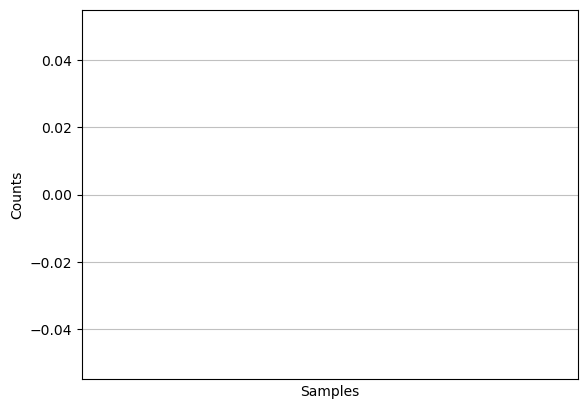

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
fd_bigrams.plot(20)

In [32]:
fd_bigrams.most_common(100)

[]

Observations

We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 

Fried Rice , Ice cream , non-veg , chicken biryani , main course
Fried Rice


Factors contributing to restaurant experience are : 

good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

There's a key insight here: the expense factor, which was missed by individual word frequency counts, 
was picked up by the bigram frequency counts.

In [33]:
### but there is no conclusion about north Indian or south Indian bcz it can be dish or it can be regional people as well..
### so lets perform trigram anlysis to come up with some more meaningful insights..

### c.. Trigram Analysis

In [34]:
tri_grams = trigrams(total_reviews_1D)

NameError: name 'total_reviews_1D' is not defined

In [35]:

# Generating trigrams from the reviews
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

NameError: name 'tri_grams' is not defined

In [36]:
fd_trigrams.most_common(50)

[]

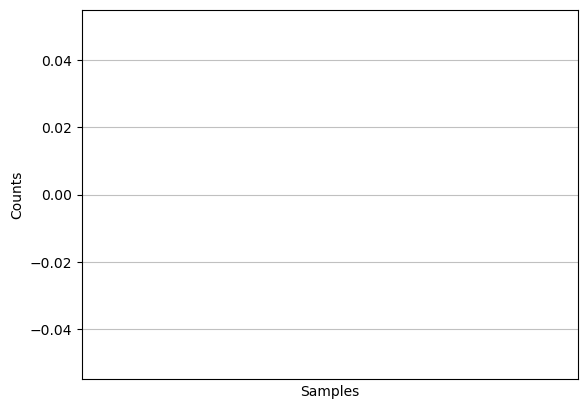

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
fd_trigrams.plot(20)

### Observations
There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that.

The specific food preferences we can see here are north Indian Food , paneer butter masala,

South Indian food & chicken fried rice...

ie , Bangalore is full of chicken lovers...

In [38]:
### Similarly we can use cuisines features for Text Analysis as well..

# 7.. Extract geographical-coordinates from data ..
Prb st : where are most of the North-Indian restaurants situated in Bengaluru ? 
          First extract latitudes & longitudes from data so that we are able to use maps..

In [39]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [40]:
!pip install geocoder
!pip install geopy

In [41]:
### lets make these below places more accurate , so that we are able to extract more accurate latitudes & longitudes
### otherwise it might return geographical co-ordinates outside of Bengaluru as well 

In [42]:
df["location"]

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [43]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [44]:
len(df["location"].unique())

94

In [45]:
### Lets add 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [46]:
df['location']

0           Banashankari , Bangalore  , Karnataka , India 
1           Banashankari , Bangalore  , Karnataka , India 
2           Banashankari , Bangalore  , Karnataka , India 
3           Banashankari , Bangalore  , Karnataka , India 
4           Basavanagudi , Bangalore  , Karnataka , India 
                               ...                        
51712         Whitefield , Bangalore  , Karnataka , India 
51713         Whitefield , Bangalore  , Karnataka , India 
51714         Whitefield , Bangalore  , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51717, dtype: object

In [47]:
df['location'].unique()

array(['Banashankari , Bangalore  , Karnataka , India ',
       'Basavanagudi , Bangalore  , Karnataka , India ',
       'Mysore Road , Bangalore  , Karnataka , India ',
       'Jayanagar , Bangalore  , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore  , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore  , Karnataka , India ',
       'Vijay Nagar , Bangalore  , Karnataka , India ',
       'Uttarahalli , Bangalore  , Karnataka , India ',
       'JP Nagar , Bangalore  , Karnataka , India ',
       'South Bangalore , Bangalore  , Karnataka , India ',
       'City Market , Bangalore  , Karnataka , India ',
       'Nagarbhavi , Bangalore  , Karnataka , India ',
       'Bannerghatta Road , Bangalore  , Karnataka , India ',
       'BTM , Bangalore  , Karnataka , India ',
       'Kanakapura Road , Bangalore  , Karnataka , India ',
       'Bommanahalli , Bangalore  , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore  , Karnataka , India ',
       'Electronic Ci

In [48]:
df_copy = df.copy()

In [49]:
df_copy['location'].isnull().sum()

21

In [50]:
df_copy = df_copy.dropna(subset=['location'])

In [51]:
df_copy['location'].isnull().sum()

0

In [52]:
locations = pd.DataFrame(df_copy['location'].unique())

In [53]:
locations.columns = ['name']

In [54]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [55]:
from geopy.geocoders import Nominatim

In [56]:
### assign timeout=None in order to get rid of timeout error.
geolocator=Nominatim(user_agent="app",timeout=None)

In [58]:
lat=[]
lon=[]
for location in locations["name"]:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
        

In [59]:
locations['latitude'] = lat
locations['longitude'] = lon

We have found out latitude and longitude of each location listed in the dataset using geopy
This is used to plot maps.

In [60]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915219,77.573621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


# 8.. Lets build geographical Heat-Map

In [61]:
### lets figure it out whether we have misssing values or not !
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [62]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [63]:
### lets take help of google in such circumstances..
### google as "co-ordinates of St. Marks Road bengalore" , so co-ordinates as :
### 12.9764122° N(Latitude), 77.6017437° E(Longitude)

In [64]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [66]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [69]:
df['cuisines'].isnull().sum()

45

In [70]:
df=df.dropna(subset=["cuisines"])

In [71]:
### lets find it out what are those areas where we have most number of North-Indian restaurants ?
## ie lets extract dataframe of only 'North Indian' cuisine restaurant..

north_india = df[df['cuisines'].str.contains('North Indian')]

In [72]:
north_india.shape

(21085, 18)

In [74]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [75]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})

In [76]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , I...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [77]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915219,77.573621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [78]:
### lets create Heatmap of this results so that it becomes more user-friendly..
## now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..
heatmap_df = north_india_rest_count.merge(locations , on='name' , how='left')

In [79]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.912264,77.590457
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , I...",2,12.973393,77.611234
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [82]:
!pip install folium

     -------------------------------------- 97.0/97.0 kB 615.6 kB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00


In [84]:
import folium


In [85]:
basemap=folium.Map()

In [86]:
basemap

In [87]:
from folium.plugins import HeatMap

In [88]:
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

In [89]:
basemap

# conclusions(Inferences)
1..It is clear that restaurants tend to concentrate in central bangalore area.

2..The clutter of restaurants lowers are we move away from central.

3..So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

4..note heatmap is good when we have latitude,longitude or importance of that particular place or count of that place

In [90]:
### Note : Its always good to write conclusions bcz as a Data Analyst or a Data Scientist u have to work in a team 
### & probably some of your Team members are completely unaware about Technical things..

# 9.. How to automate your task : ie Perform Automation ..

In [91]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap


In [92]:
get_heatmap('South Indian')

                                          name  count   latitude  longitude
0        BTM , Bangalore  , Karnataka , India     815  12.911276  77.604565
1   JP Nagar , Bangalore  , Karnataka , India     437  12.912264  77.590457
2        HSR , Bangalore  , Karnataka , India     436  12.911623  77.638862
3  Jayanagar , Bangalore  , Karnataka , India     416  12.929273  77.582423


In [93]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [94]:
get_heatmap('Chinese')

                                                name  count   latitude  \
0              BTM , Bangalore  , Karnataka , India    1824  12.911276   
1              HSR , Bangalore  , Karnataka , India     760  12.911623   
2  Koramangala 5th Block , Bangalore  , Karnataka...    730  12.934843   
3     Marathahalli , Bangalore  , Karnataka , India     668  12.955257   

   longitude  
0  77.604565  
1  77.638862  
2  77.618977  
3  77.698416  


In [95]:
get_heatmap('Thai')

                                                name  count   latitude  \
0  Koramangala 5th Block , Bangalore  , Karnataka...    125  12.934843   
1          MG Road , Bangalore  , Karnataka , India      71  12.975526   
2      Indiranagar , Bangalore  , Karnataka , India      62  12.973291   
3  Cunningham Road , Bangalore  , Karnataka , India      55  12.984450   

   longitude  
0  77.618977  
1  77.606790  
2  77.640467  
3  77.597113  
